In [1]:
using Distributions
using PyPlot
using HCubature
using BenchmarkTools

In [162]:
μ = [0,2]
σ = [1,3]

dist_1_x = Normal(μ[1], σ[1])
dist_1_y = Normal(μ[2], σ[2])
    
x_edges = range(-5, length = 20, stop=5) 
y_edges = range(-5, length = 25, stop=6) 
    
z1 = diff(cdf.(dist_1_y, y_edges)) * diff(cdf.(dist_1_x, x_edges))';

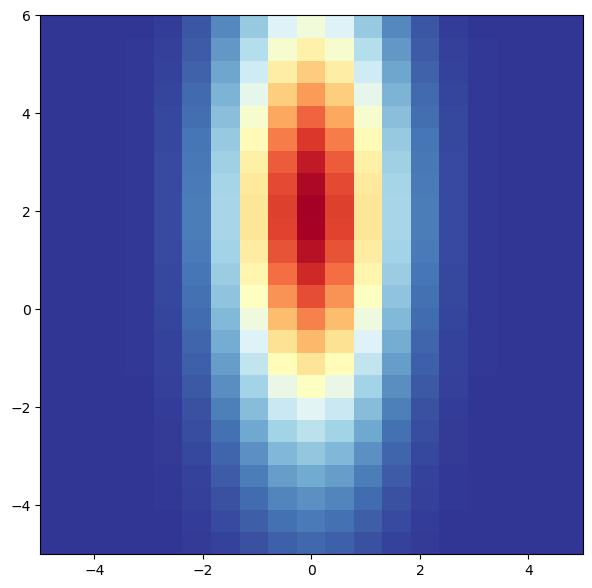

PyObject <matplotlib.collections.QuadMesh object at 0x7f00786dadf0>

In [163]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

ax.pcolormesh(x_edges, y_edges, z1, cmap="RdYlBu_r")

In [164]:
sum(z1)

0.8989729362611808

In [175]:
mvdist = MvNormal(μ, [1^2 0; 0 3^2])

α = -pi/4 
R = [cos(α) sin(α) ; -sin(α) cos(α)]

int_func(x) = pdf(mvdist, R*x)

data = zeros(Float64, size(z1))

for pix_ind in CartesianIndices(data)
    
    x_edge = pix_ind.I[2]
    y_edge = pix_ind.I[1]
    
    data[pix_ind] = hcubature(int_func, [x_edges[x_edge], y_edges[y_edge]], [x_edges[x_edge+1], y_edges[y_edge+1]], rtol=0.1, maxevals=3000)[1]
end

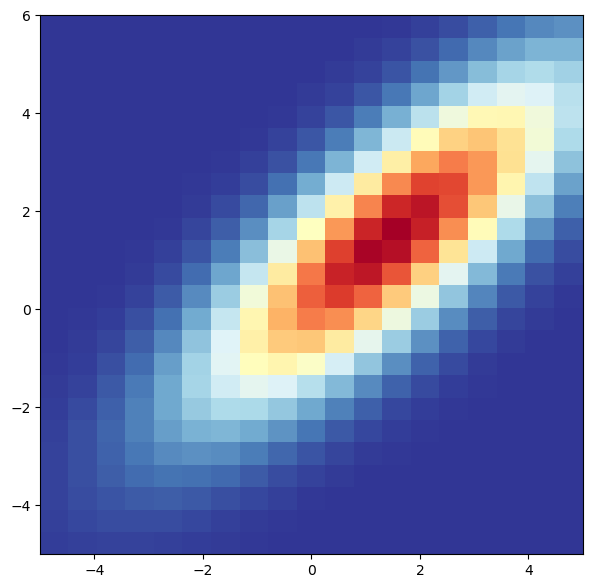

PyObject <matplotlib.collections.QuadMesh object at 0x7f0078026220>

In [176]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

ax.pcolormesh(x_edges, y_edges, data, cmap="RdYlBu_r")

In [134]:
sum(data)

0.8989729362611317

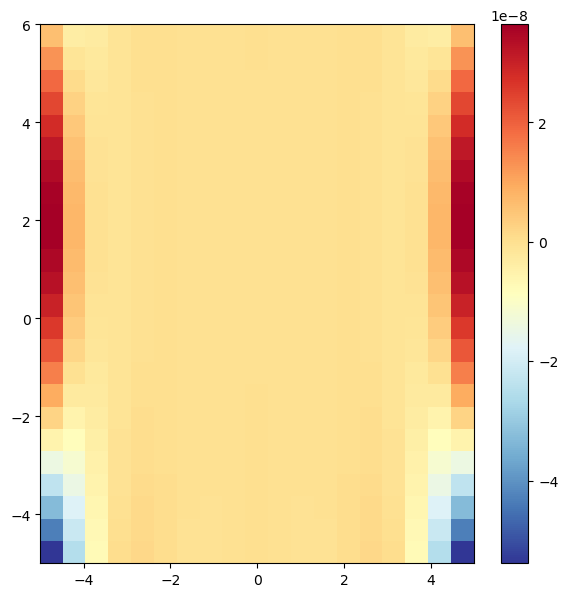

PyObject <matplotlib.colorbar.Colorbar object at 0x7f0078467490>

In [135]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

im = ax.pcolormesh(x_edges, y_edges, (data .- z1) ./ z1, cmap="RdYlBu_r")

fig.colorbar(im, orientation="vertical")

In [140]:
data = zeros(Float64, size(z1))

for pix_ind in CartesianIndices(data)
    
    x_edge = pix_ind.I[2]
    y_edge = pix_ind.I[1]
    
    x1 = [x_edges[x_edge], y_edges[y_edge]]
    x2 = [x_edges[x_edge], y_edges[y_edge+1]]
    x3 = [x_edges[x_edge+1], y_edges[y_edge]]
    x4 = [x_edges[x_edge+1], y_edges[y_edge+1]]
    
    vals = int_func.([x1, x2, x3,x4])
    
    data[pix_ind] = diff(x_edges)[1]*diff(y_edges)[1]*mean(vals)
end

In [141]:
sum(data)

0.8984282064104409

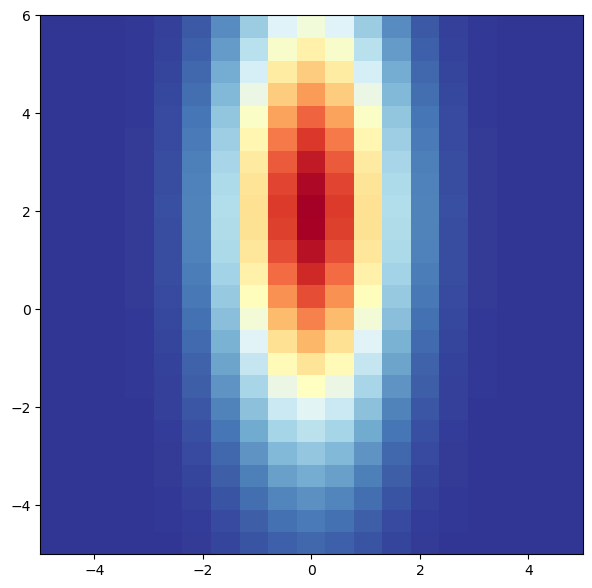

PyObject <matplotlib.collections.QuadMesh object at 0x7f00783af670>

In [142]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

ax.pcolormesh(x_edges, y_edges, data, cmap="RdYlBu_r")

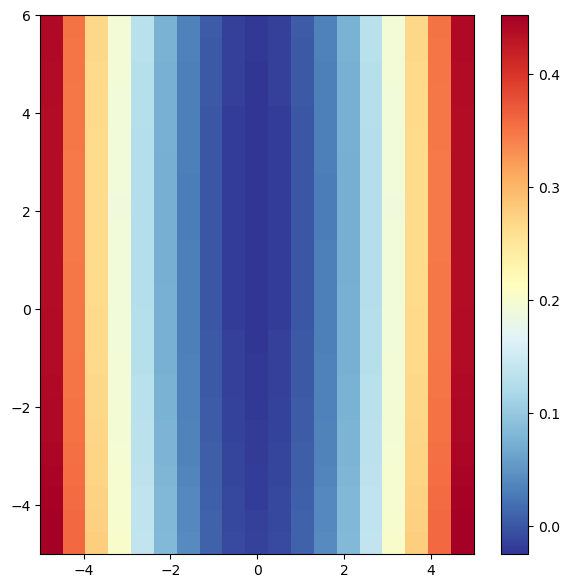

PyObject <matplotlib.colorbar.Colorbar object at 0x7f00782fe0d0>

In [143]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

im = ax.pcolormesh(x_edges, y_edges, (data .- z1) ./ z1, cmap="RdYlBu_r")

fig.colorbar(im, orientation="vertical")

In [280]:
dist_x = Normal(0, 1)
dist_y = Normal(5, 5)

x_edges = range(-5, length = 50, stop=5) 
y_edges = range(-10, length = 100, stop=10)

z1 = pdf.(dist_y, y_edges) * pdf.(dist_x, x_edges)'
z2 = [pdf(dist_x, x)*pdf(dist_y, y) for y in y_edges, x in x_edges] ;

z3 = zeros(Float64, size(z2))
for x in eachindex(x_edges), y in eachindex(y_edges)
    z3[y,x] = pdf(dist_x, x_edges[x])*pdf(dist_y, y_edges[y])
end

z4 = zeros(Float64, size(z2))
for x in eachindex(x_edges), y in eachindex(y_edges)
    z4[y,x] = pdf(MvNormal([0,5], [1^2 0;0 5^2]), [x_edges[x],y_edges[y]])
end

# zind = Array{Float64,1}[[x,y] for y in y_edges, x in x_edges]
# z5 = broadcast(x->pdf(MvNormal([0,5], [1^2 0;0 5^2]), x), zind)

z5 = [pdf(MvNormal([0,5], [1^2 0;0 5^2]), [x,y]) for y in y_edges, x in x_edges] ;

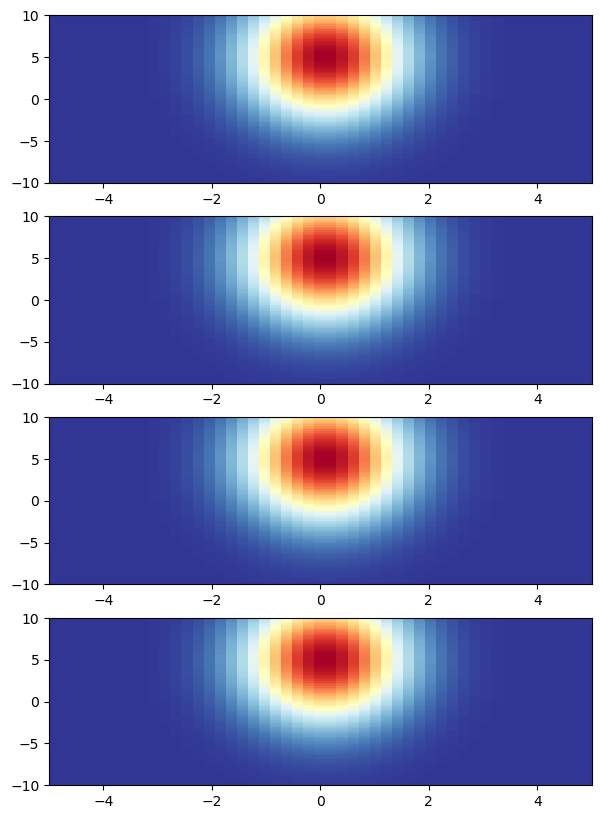

PyObject <matplotlib.collections.QuadMesh object at 0x7f007700c610>

In [281]:
fig, ax = plt.subplots(4,1, figsize=(7,10))

ax[1].pcolormesh(x_edges, y_edges, z1, cmap="RdYlBu_r")
ax[2].pcolormesh(x_edges, y_edges, z2, cmap="RdYlBu_r")
ax[3].pcolormesh(x_edges, y_edges, z3, cmap="RdYlBu_r")
ax[4].pcolormesh(x_edges, y_edges, z5, cmap="RdYlBu_r")

In [196]:
map((x,y)-> x+y, [1,2,3], [6,7,8])

3-element Array{Int64,1}:
  7
  9
 11